In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from word2number import w2n
from sklearn.linear_model import LinearRegression

In [6]:

data = pd.read_csv('ds_salaries.csv',index_col = 0)
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [7]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
data.shape

(607, 11)

In [10]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
null = data.isnull()
null

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
602,False,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False,False
605,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Find unique values in multiple columns
unique_values = data.nunique()
print(unique_values)

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64


In [13]:
x = data.drop(['job_title','salary','salary_currency','salary_in_usd','employee_residence','company_location'],axis = 'columns')
x

,work_year,experience_level,employment_type,remote_ratio,company_size
0,2020,MI,FT,0,L
1,2020,SE,FT,0,S
2,2020,SE,FT,50,M
3,2020,MI,FT,0,S
4,2020,SE,FT,50,L
...,...,...,...,...,...
602,2022,SE,FT,100,M
603,2022,SE,FT,100,M
604,2022,SE,FT,0,M
605,2022,SE,FT,100,M


In [14]:
x.shape

(607, 5)

In [15]:
x['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [16]:
x['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [17]:
x['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [18]:
x['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [19]:
data['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [20]:
x['experience_level'] = x['experience_level'].replace(['MI', 'SE', 'EN', 'EX'], [1, 2, 3, 4])

In [21]:
x

,work_year,experience_level,employment_type,remote_ratio,company_size
0,2020,1,FT,0,L
1,2020,2,FT,0,S
2,2020,2,FT,50,M
3,2020,1,FT,0,S
4,2020,2,FT,50,L
...,...,...,...,...,...
602,2022,2,FT,100,M
603,2022,2,FT,100,M
604,2022,2,FT,0,M
605,2022,2,FT,100,M


In [22]:
x['employment_type'] = x['employment_type'].replace(['FT', 'CT', 'PT', 'FL'], [1, 2, 3, 4])
x

,work_year,experience_level,employment_type,remote_ratio,company_size
0,2020,1,1,0,L
1,2020,2,1,0,S
2,2020,2,1,50,M
3,2020,1,1,0,S
4,2020,2,1,50,L
...,...,...,...,...,...
602,2022,2,1,100,M
603,2022,2,1,100,M
604,2022,2,1,0,M
605,2022,2,1,100,M


In [23]:
x['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [24]:
x['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [25]:
x['company_size'] = x['company_size'].replace(['S','M','L'], [1, 2, 3])
x

,work_year,experience_level,employment_type,remote_ratio,company_size
0,2020,1,1,0,3
1,2020,2,1,0,1
2,2020,2,1,50,2
3,2020,1,1,0,1
4,2020,2,1,50,3
...,...,...,...,...,...
602,2022,2,1,100,2
603,2022,2,1,100,2
604,2022,2,1,0,2
605,2022,2,1,100,2


In [26]:
y = data.salary

In [27]:
y

0       70000
1      260000
2       85000
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary, Length: 607, dtype: int64

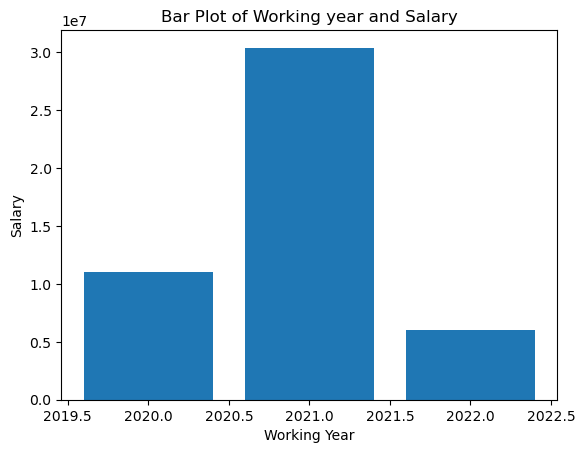

In [28]:
plt.bar(x["work_year"],y)
plt.xlabel("Working Year")
plt.ylabel("Salary")
plt.title("Bar Plot of Working year and Salary")
plt.show()

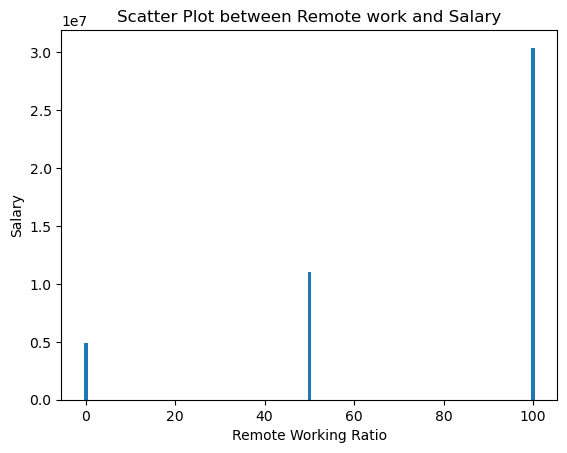

In [29]:
%matplotlib inline
plt.xlabel("Remote Working Ratio")
plt.ylabel("Salary")
plt.title("Scatter Plot between Remote work and Salary")
plt.bar(x['remote_ratio'],y)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
X_train

,work_year,experience_level,employment_type,remote_ratio,company_size
9,2020,2,1,50,1
227,2021,1,1,50,3
591,2022,2,1,100,2
516,2022,2,1,100,2
132,2021,1,1,100,2
...,...,...,...,...,...
71,2020,1,1,50,1
106,2021,1,1,100,3
270,2021,3,1,100,3
435,2022,1,1,100,2


In [34]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [35]:
reg.predict(X_test)

array([1.40673739e+05, 1.40673739e+05, 2.77550337e+05, 3.10779782e+05,
       5.44689593e+05, 1.99553976e+05, 4.46604203e+05, 3.63771536e+05,
       1.31560085e+05, 3.63771536e+05, 3.60383004e+05, 1.40673739e+05,
       1.40673739e+05, 4.76695703e+05, 4.32654243e+05, 1.40673739e+05,
       2.92389114e+05, 4.08701813e+05, 4.26929121e+05, 1.40673739e+05,
       5.00648134e+05, 5.17781374e+04, 1.40673739e+05, 4.08701813e+05,
       2.82386643e+05, 2.14392752e+05, 2.76661520e+05, 4.76695703e+05,
       1.40673739e+05, 1.31560085e+05, 4.94923011e+05, 1.40673739e+05,
       1.40673739e+05, 1.49787393e+05, 2.14392752e+05, 1.40673739e+05,
       1.31560085e+05, 1.40673739e+05, 1.64626170e+05, 2.76661520e+05,
       1.40673739e+05, 1.40673739e+05, 6.31799609e+05, 9.52226382e+03,
       1.40673739e+05, 6.90679845e+05, 2.50923503e+05, 4.08701813e+05,
       2.67547866e+05, 2.71825215e+05, 1.40673739e+05, 2.82386643e+05,
       2.67547866e+05, 1.40673739e+05, 1.40673739e+05, 1.40673739e+05,
      

In [36]:
reg.score(X_test,y_test)

0.001350496731679418

In [37]:
reg.coef_

array([-145990.25203009,    9113.65402828,  -97922.03004651,
         -1359.87780791,  131151.47534347])

In [42]:
from sklearn.metrics import mean_squared_error
import math
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 8072273896591.641
Root Mean Squared Error: 2841174.738834562
